In [29]:
# Feature Engineering (TF-IDF) + ML (NaiveBayes) 

In [30]:
# packages
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [31]:
import sys
import os
sys.path.insert(0, os.path.abspath('../../../'))

# ModelEvaluation
from ModelEvaluation.ModelEvaluation import ModelEvaluation


In [32]:
# dataset
file_path = '../../../datasets/with_stop_word/amazon_user_reviews_text_sentiment_with_sw.parquet'
df = pd.read_parquet(file_path)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18400 entries, 0 to 18399
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   sentiment      18400 non-null  int64 
 1   original_text  18400 non-null  object
dtypes: int64(1), object(1)
memory usage: 287.6+ KB


In [33]:
# feature and target
features = "original_text"
target = "sentiment"

# Feature Engineering (TF-IDF)
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
corpus = df[features]
X = vectorizer.fit_transform(corpus)

In [34]:
# training and test dataset split
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Standardization
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# Model Training: NB
model = GaussianNB()
model.fit(X_train.toarray(), y_train) # tfidf result is matrix, NB needs array

# Prediction
y_pred = model.predict(X_test.toarray())
y_score = model.predict_proba(X_test.toarray())

MODEL EVALUATION METRICS
Accuracy:  0.3812
Precision: 0.3904
Recall:    0.3812
F1-Score:  0.3611

CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.43      0.28      0.34      1243
           1       0.37      0.22      0.28      1209
           2       0.37      0.64      0.47      1228

    accuracy                           0.38      3680
   macro avg       0.39      0.38      0.36      3680
weighted avg       0.39      0.38      0.36      3680

ROC=AUC REPORT
AUC score: 0.5359214190806116


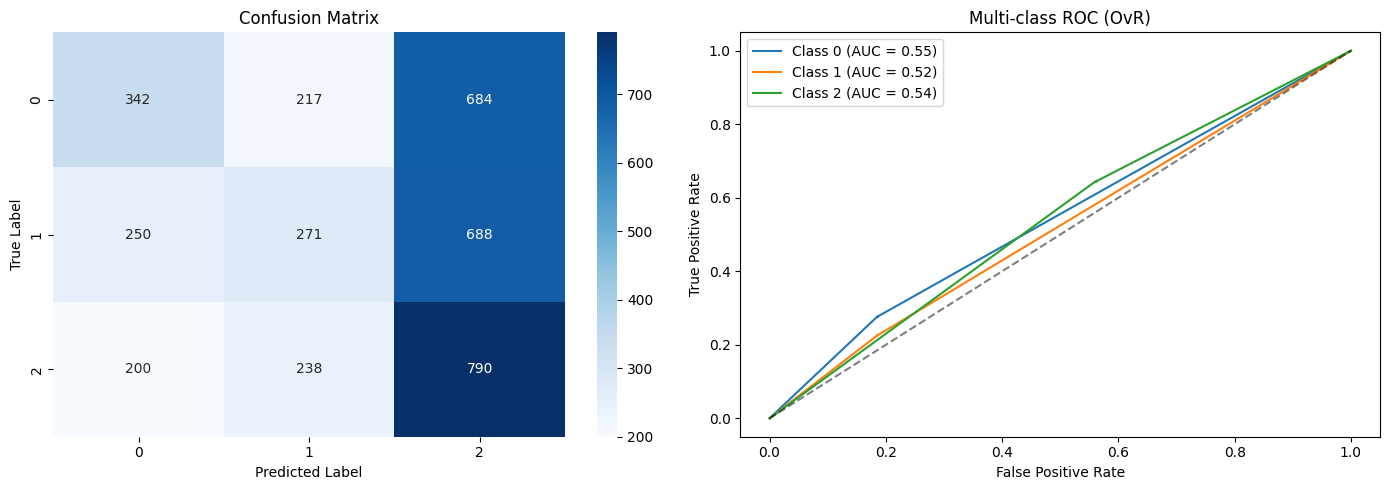

In [35]:
# Model Evaluation
evaluator = ModelEvaluation()
evaluator.run_pipeline(y_test, y_pred, y_score)